In [71]:
import os
import time

import numpy as np
import scipy as sp
from scipy import sparse
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 18

import uproot

In [2]:
datasets = {
    "GamGam": {
        "Data": [
            "data_A.GamGam",
            "data_B.GamGam",
            "data_C.GamGam",
            "data_D.GamGam"
        ],
        "MC": [
            ("mc_341081.ttH125_gamgam.GamGam", {"tag": "tt"}),
            ("mc_343981.ggH125_gamgam.GamGam", {"tag": "gg"}),
            ("mc_345041.VBFH125_gamgam.GamGam", {"tag": "VBF"}),
            ("mc_345318.WpH125J_Wincl_gamgam.GamGam", {"tag": "Wp"}),
            ("mc_345319.ZH125J_Zincl_gamgam.GamGam", {"tag": "Z"})

        ]
    }
}

In [10]:
data_path = "root://eosuser.cern.ch//eos/user/a/ananiev/data/"
output_path = "/afs/cern.ch/user/a/ananiev/cernbox/output/"

In [15]:
features = pd.read_csv(os.path.join(output_path, "hgg_features.tsv"), sep="\t")
features.head()

,photon_n,photon_1lead_pt,photon_1lead_eta,photon_1lead_phi,photon_1lead_E,photon_1lead_etcone20,photon_2lead_pt,photon_2lead_eta,photon_2lead_phi,photon_2lead_E,...,lep_ptcone30_std,lep_etcone20_min,lep_etcone20_max,lep_etcone20_mean,lep_etcone20_sum,lep_etcone20_std,weight,met_et,met_phi,label
0,2,79637.190,0.562852,2.389571,92588.360,-469.98776,33715.473,-0.890417,-1.640194,47987.750,...,NaN,inf,-inf,NaN,0.00000,NaN,2.777705e-09,63926.910,-1.700346,Z
1,2,64152.520,0.215146,2.676525,65642.990,-1126.37070,41146.766,1.869424,0.862321,136582.080,...,0.0,560.75073,560.75073,560.750732,560.75073,NaN,1.914909e-09,36210.453,0.776715,Z
2,2,65308.312,-0.572892,0.666524,76321.930,-576.82610,56734.710,0.523893,-1.509786,64700.240,...,NaN,inf,-inf,NaN,0.00000,NaN,4.527038e-09,34380.285,-2.235435,Z
3,2,100806.766,0.973148,2.401619,152427.560,-388.21835,36963.773,-0.148772,-1.956260,37373.590,...,NaN,inf,-inf,NaN,0.00000,NaN,-4.624522e-09,132593.000,-0.442595,Z
4,2,78665.016,-0.843279,-1.762181,108332.445,-1499.26400,46336.723,0.833581,-0.780118,63389.492,...,NaN,inf,-inf,NaN,0.00000,NaN,4.399376e-09,65875.420,2.367692,Z


In [23]:
def total_nums(datasets, features):
    nums = {}
    
    counts = features["label"].value_counts()
    nums["after"] = dict(zip(counts.index.values, counts.values))
    
    nums["before"] = {}
    prefix = os.path.join(data_path, "GamGam/MC")
    for fname, meta in datasets["GamGam"]["MC"]:
        with uproot.open(os.path.join(prefix, f"{fname}.root")) as f:
            nums["before"][meta["tag"]] = f["mini"].numentries
    
    return pd.DataFrame(nums)
hgg_total_nums = total_nums(datasets, features)

None

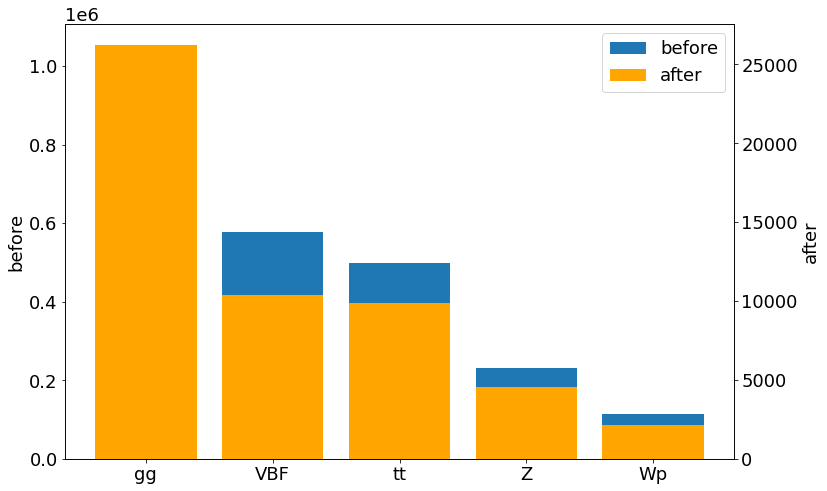

In [74]:
fig, ax = plt.subplots()
def plot_nums(ax, nums):
    befores = nums["before"].sort_values(ascending=False)
    afters = nums["after"].sort_values(ascending=False)
    lines = {}
    lines["before"] = ax.bar(befores.index.values, befores.values)
    ax.set_ylabel("before")
    ax1 = ax.twinx()
    lines["after"] = ax1.bar(afters.index.values, afters.values, color="orange")
    ax1.set_ylabel("after")
    ax.legend(lines.values(), lines.keys())
display(plot_nums(ax, hgg_total_nums))
fig.savefig("output/total_nums.png");